# Homework 4 - Phys 434
## Andrew Spicciati
## 10/27/21

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

import pandas as pd

plt.rcParams["figure.figsize"] = (10,7)


# Problem 1

In [166]:
x = np.linspace(-5,5,41)
bkgd = stats.norm.rvs(size=1000000,scale=2)
signal = stats.uniform.rvs(0,20,size=1000000)

In [167]:
np.mean(signal)

9.999660988776613

<ipython-input-276-5c17cc56f583>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

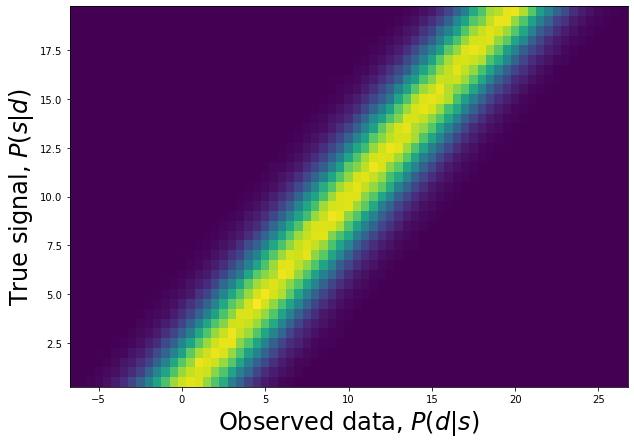

In [276]:
data = bkgd + signal

signaledges = np.linspace(0,20,41)
dataedges = np.linspace(-7,27,69)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

# Problem 1b

In [266]:
#for a value of ~10
idx = np.argwhere(temp2==10)[0]

In [267]:
#the actual mean is 10
temp2[idx][0]

10.0

In [277]:
Psd.shape

(68, 40)

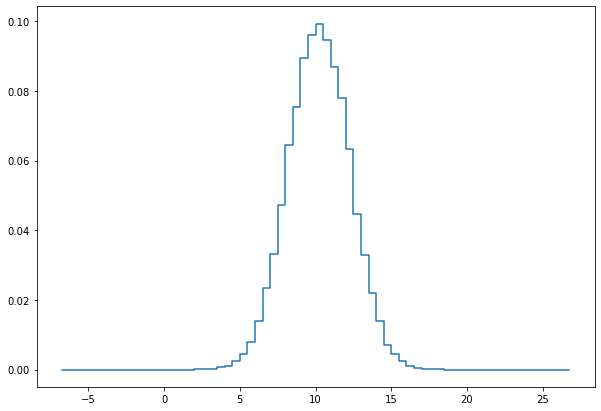

In [274]:
plt.step(datacenters,Psd[:,idx]*10,where='mid')

# Problem 1c

In [275]:
idx = np.argwhere(temp == 10)[0]
temp[idx][0]

10.0

In [285]:
sum(Psd[idx,:][0])

0.09942099420994208

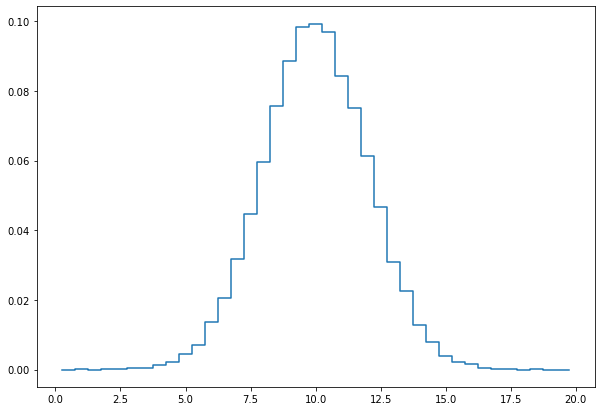

In [286]:
plt.step(signalcenters,Psd[idx,:][0]*10)